In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
base_dir = "data"
df_dir = os.path.join(base_dir, "Invistico_Airline.csv")

In [3]:
df = pd.read_csv(df_dir)
print("Kích thước df: ", df.shape)

Kích thước df:  (129880, 23)


In [4]:
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


## 1. Lấy dữ liệu

Dữ liệu về độ hài lòng về dịch vụ hàng không được lấy từ khảo sát khác hàng của một công ty hàng không.

Nguồn: https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction

License CC0: Public Domain

Dữ liệu được thu thập thông qua khảo sát đánh giá của khách hàng sử dụng dịch vụ.

## 2. Khám phá dữ liệu

#### Kích thước dữ liệu

In [5]:
print("Số dòng: ", df.shape[0])
print("Số cột: ",  df.shape[1])

Số dòng:  129880
Số cột:  23


#### Xét theo dòng

In [6]:
df.iloc[0, :]

satisfaction                               satisfied
Gender                                        Female
Customer Type                         Loyal Customer
Age                                               65
Type of Travel                       Personal Travel
Class                                            Eco
Flight Distance                                  265
Seat comfort                                       0
Departure/Arrival time convenient                  0
Food and drink                                     0
Gate location                                      2
Inflight wifi service                              2
Inflight entertainment                             4
Online support                                     2
Ease of Online booking                             3
On-board service                                   3
Leg room service                                   0
Baggage handling                                   3
Checkin service                               

Mỗi dòng là kết quả khảo sát chuyến bay của một hành khách

Các thông tin trên một dòng bao gồm 
+ độ hài lòng của khách hàng
+ Giới tính khách hàng 
+ Loại khách hàng
+ Tuổi
+ Loại chuyến đi
+ Dịch vụ 
+ Khoảng cách di chuyển
+ Độ thoải mái ghế ngồi
+ Thuận tiện thời gian đến/đi
+ Đồ ăn/uống
+ Địa điểm cổng
+ Wifi
+ Giải trí trên chuyến bay
+ Hỗ trợ trực tuyến
+ Đặt vé trực tuyến
+ Dịch vụ tại chỗ
+ Chỗ để chân
+ Hành lý
+ Checkin
+ Vệ sinh
+ Checkin trực tuyến
+ Độ trễ cất cánh
+ Độ trễ hạ cánh. 

#### Xét theo cột

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

Hầu hết các cột đều có dữ liệu int64, có 5 cột có dữ liệu dạng object, 1 cột có dữ liệu dạng float64.

Lưu ý: cột 21 và 22 có ý nghĩa tương tự nhau nhưng lại được lưu với 2 kiểu dữ liệu khác nhau, cột 22 có giá trị null.

##### Các cột giá trị số

In [8]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Xét các dữ liệu số:

+ Các cột về mức độ hài lòng về các mặt của khách hàng đều có kiểu giá trị int64, được đánh số từ 0-5.

+ Tuổi của hành khách nhỏ nhất là 7, lớn nhất là 85, trung bình 39-40 tuổi.

+ Khoảng cách bay nhỏ nhất là 50 dv, lớn nhất là hơn 6500 dv, đơn vị đo khoảng cách không được nêu ở nguồn của dữ liệu.

+ 2 cột cuối có giá trị khá tương đồng nhau (do trễ cất cánh thường kéo theo trễ hạ cánh)

##### Các cột giá trị object

In [9]:
df.describe(include="object")

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


Xét các dữ liệu object:

+ Các cột đều có 2 giá trị có thể có, ngoại trừ cột Class có 3 giá trị có thể có.


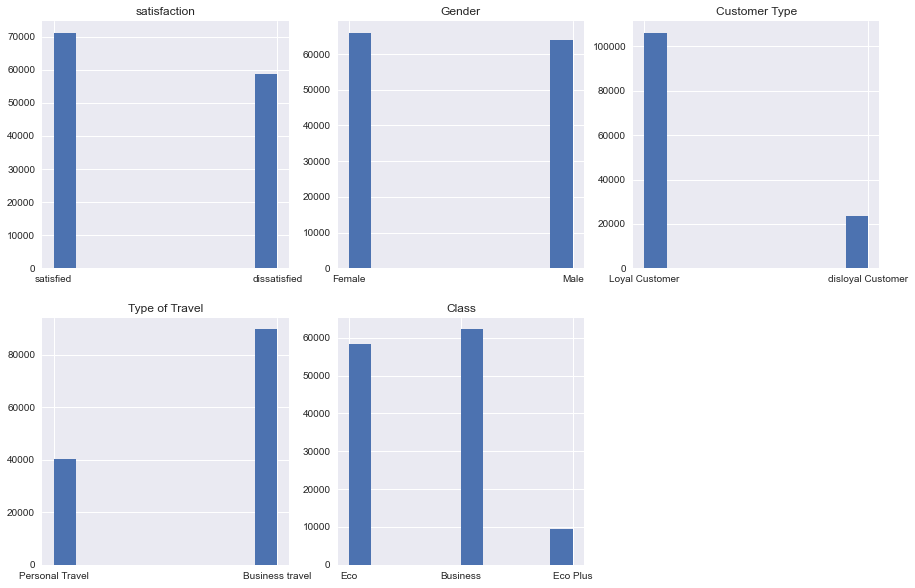

In [10]:
plt.figure(figsize=(15, 10))
plt.style.use("seaborn")
cols = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[cols[i]])
    plt.title(cols[i])

+ Cột satisfication bao gồm 2 giá trị satisfied (hài lòng) và dissastified (không hài lòng)

+ Cột gender cho biết giới tính của hành khách gồm Female (nữ) và Male (nam)

+ Loại khách hàng bao gồm Loyal Customer (Khách hàng thân thiết) và Disloyal Customer (Khách hàng thông thường)

+ Loại chuyến đi cho biết mục đích chuyến đi bao gồm Personal Travel (mục đích cá nhân) và Business Travel (mục đích công việc)

+ Cột class cho biết loại dịch vụ bao gồm Eco (khoang phổ thông), Eco plus, và Business (khoang thương gia) 

#### Tiền xử lý

Ta nhận thấy cột "Arrival Delay in Minutes" có các giá trị bị thiếu, để điền khuyết các thông tin này có thể có các cách sau:
+ Điền bằng 0
+ Điền bằng trung bình / trung vị

Tuy nhiên, có thể nhận thấy thời gian trễ hạ cánh phụ thuộc nhiều vào thời gian trễ cất cánh "Departure Delay in Minutes", để thử nghiệm giả thuyết này, ta sẽ tính tương quan giữa hai cột này. 

[[1.         0.96564005]
 [0.96564005 1.        ]]


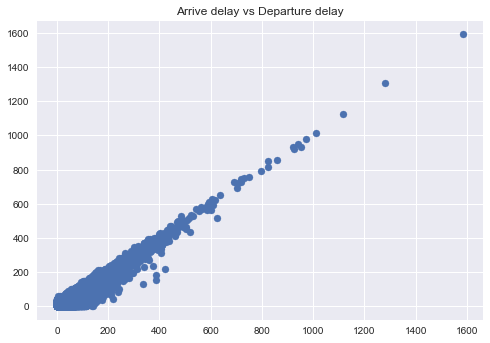

In [144]:
arrive_delay        = df["Arrival Delay in Minutes"]
sel = ~arrive_delay.isna()

arrive_delay_not_na    = arrive_delay[sel]
departure_delay = df["Departure Delay in Minutes"][sel]

print(np.corrcoef(arrive_delay_not_na, departure_delay))
plt.scatter(arrive_delay_not_na, departure_delay); plt.title("Arrive delay vs Departure delay");

Như vậy có tương quan lớn giữa arrive_delay và departure_delay (0.96529118), như vậy ta có thể sử dụng departure_delay để điền khuyết các giá trị arrive_delay

In [12]:
print("Original: ")
df[["Arrival Delay in Minutes"]].info()
print("-" * 100)
print("Filling missing value: ")
df["Arrival Delay in Minutes"].fillna(value=df["Departure Delay in Minutes"], inplace=True)
df[["Arrival Delay in Minutes"]].info()

Original: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 1 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Arrival Delay in Minutes  129487 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB
----------------------------------------------------------------------------------------------------
Filling missing value: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 1 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Arrival Delay in Minutes  129880 non-null  float64
dtypes: float64(1)
memory usage: 1014.8 KB


Đổi kiểu dữ liệu của "Arrival Delay in Minutes" thành int64

In [13]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Inflight wifi service              129880 non-null  

Để tiện tính toán trên cột satisfaction, ta sẽ tạo cột "satisfaction_bin" nhận giá trị nhị phân 1 - nếu khách hàng hài lòng 0 - nếu không hài lòng.

In [15]:
df["satisfaction_bin"] = df["satisfaction"] == "satisfied"

## Các câu hỏi đặt ra:

1. Các hạng vé khác nhau có sự khác nhau về độ hài lòng của hành khách như thế nào ?

2. Các yếu tố ảnh hưởng đến độ hài lòng đối với hành khách nam và nữ có khác gì nhau không ?

#### 1. Loại dịch vụ (phổ thông, phổ thông nâng cao, thương gia) có sự khác nhau về độ hài lòng như thế nào ?

Tỉ lệ hài lòng Eco:  0.393987206091684
Tỉ lệ hài lòng Eco Plus:  0.42705344809265755
Tỉ lệ hài lòng Business:  0.7093790218790219


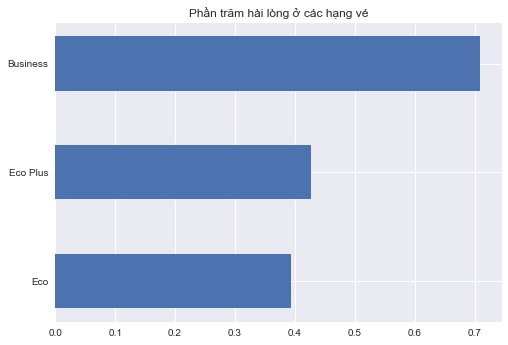

In [145]:
df_eco = df[df["Class"] == "Eco"]
df_eco_plus = df[df["Class"] == "Eco Plus"]
df_business = df[df["Class"] == "Business"]

eco_perc      = df_eco["satisfaction_bin"].agg("mean")
eco_plus_perc = df_eco_plus["satisfaction_bin"].agg("mean")
business_perc = df_business["satisfaction_bin"].agg("mean")



print("Tỉ lệ hài lòng Eco: ",      eco_perc)
print("Tỉ lệ hài lòng Eco Plus: ", eco_plus_perc)
print("Tỉ lệ hài lòng Business: ", business_perc)
plt.title("Phần trăm hài lòng ở các hạng vé")
plt.barh(y = ["Eco", "Eco Plus", "Business"], width = [eco_perc, eco_plus_perc, business_perc], height=0.5);

Ta nhận thấy tỉ lệ khách hàng hài lòng ở khoang hạng thương gia cao hơn hẳn so với hai hạng còn lại, trong khi đó Eco Plus và Eco lại khá tương đồng nhau về tỉ lệ này.

Điều này có thể lý giải bởi các dịch vụ ở hạng cao cấp hơn thì tốt hơn, để tìm hiểu thêm về sự khác nhau giữa các hạng vé, chúng ta sẽ xét về sự khác nhau về điểm trung bình ở các hạng mục.

#### Sự khác nhau về điểm trung bình ở các hạng mục thuộc các hạng vé khác nhau

In [17]:
#Danh sách các điểm đánh giá
cols = df.loc[:, "Seat comfort":"Online boarding"].columns.to_list()
#Lấy ra dataframe gồm Class và các điểm
df_rates_by_class = df[["Class"] + cols]
#Tính trung bình
df_mean_rates     = df_rates_by_class.groupby("Class").agg("mean")
df_mean_rates

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
Class,,,,,,,,,,,,,,
Business,2.789897,2.898938,2.926770,2.985280,3.335553,3.732223,3.770866,3.653427,3.693082,3.664994,3.853620,3.526030,3.855502,3.490492
Eco,2.874908,3.070932,2.776964,2.996313,3.168310,3.057693,3.288823,3.305356,3.269924,3.328200,3.565539,3.186969,3.581797,3.227358
Eco Plus,2.935288,3.098927,2.822973,2.987887,3.179046,3.098502,3.291255,3.307619,3.168207,3.280098,3.458719,3.070556,3.484752,3.217618


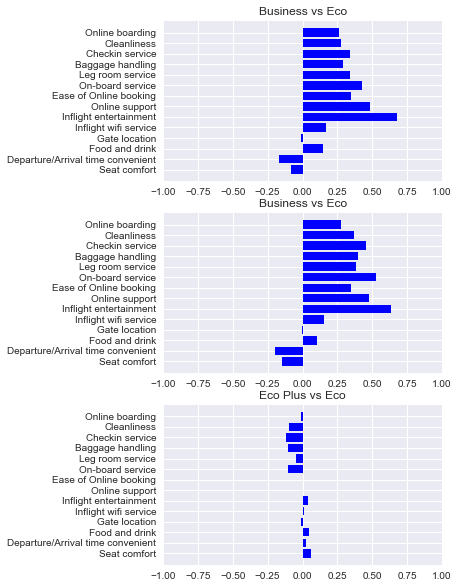

In [18]:
#Tính sai khác các điểm trung bình
bsn_eco_diff  = df_mean_rates.loc["Business"] - df_mean_rates.loc["Eco"]
bsn_ecop_diff = df_mean_rates.loc["Business"] - df_mean_rates.loc["Eco Plus"]
ecop_eco_diff = df_mean_rates.loc["Eco Plus"] - df_mean_rates.loc["Eco"]

plt.figure(figsize=(5, 10))

plt.subplot(3, 1, 1)
plt.barh(y=df_mean_rates.columns.to_list(), width=bsn_eco_diff, color="b"); plt.xlim(-1, 1); plt.title("Business vs Eco")

plt.subplot(3, 1, 2)
plt.barh(y=df_mean_rates.columns.to_list(), width=bsn_ecop_diff, color="b"); plt.xlim(-1, 1); plt.title("Business vs Eco")

plt.subplot(3, 1, 3)
plt.barh(y=df_mean_rates.columns.to_list(), width=ecop_eco_diff, color="b"); plt.xlim(-1, 1); plt.title("Eco Plus vs Eco");

+ Hạng thương gia (business) được đánh giá cao hơn ở hầu hết các hạng mục, trong đó cách biệt lớn nhất đến từ hạng mục "Giải trí trên chuyến bay" (Inflight Entertainment), ngạc nhiên là hạng thương gia lại bị đánh giá thấp hơn ở hạng mục "mức độ thoải mái ghế ngồi" (Seat comfort). 

+ Trong khi đó hạng phổ thông (Eco) và phổ thông nâng cao (Eco Plus) lại có sự khác biệt tương đối ít, điều này phụ hợp khi tỉ lệ hài lòng ở hai hạng này tương tự nhau.

#### 2. Các yếu tố ảnh hưởng đến độ hài lòng đối với hành khách nam và nữ có khác gì nhau không ?

In [19]:
df_male   = df[df["Gender"] == "Male"]
df_female = df[df["Gender"] == "Female"]

In [20]:
#Lấy tương quan giữa satisfaction_bin và các cột số, bỏ cột tương quan satisfaction và chính nó (= 1)
factor_male = df_male.corr()[["satisfaction_bin"]].drop("satisfaction_bin", axis=0)
factor_female = df_female.corr()[["satisfaction_bin"]].drop("satisfaction_bin", axis=0)

#Đổi tên cột để join thành 1 dataframe
A = factor_male.rename({"satisfaction_bin" : "Male corr"}, axis=1)
B = factor_female.rename({"satisfaction_bin" : "Female corr"}, axis=1)

C = A.join(B)

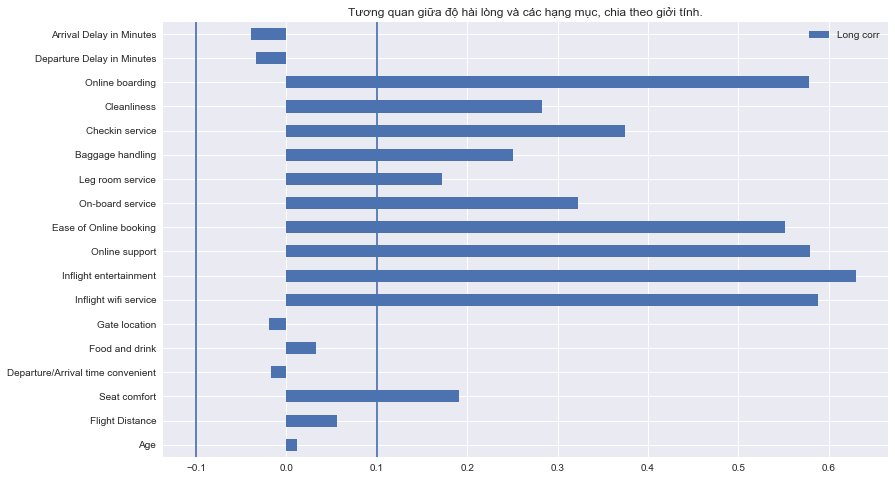

In [146]:
plt.figure(figsize=(13, 8))

ax = plt.gca()
plt.title("Tương quan giữa độ hài lòng và các hạng mục, chia theo giởi tính.")
C.plot.barh(ax=ax)
plt.axvline(x= 0.1)
plt.axvline(x=-0.1);

Xét các yếu tố có tương quan có trị tuyệt đối lớn hơn 0.1.

+ Ta thấy yếu tố ảnh hưởng hàng đầu đối với hành khách nam là "dịch vụ giải trí trên chuyến bay" trong khi đối với hành khách nữ là "độ dễ dàng đặt vé qua mạng".

+ Các hành khách nữ quan tâm đến các yếu tố "Độ sạch sẽ", "Dịch vụ checking", "Hỗ trợ khuân vác hành lý" và "Chỗ ngồi có thể duỗi chân" (Leg room service: https://www.rung.vn/dict/en_vn/Legroom) hơn hẳn các hành khách nam, bên cạnh đó việc trễ/hoãn chuyến bay cũng làm giảm mức độ hài lòng của hành khách nữ rõ rệt hơn ở hành khách nam.

+ Trong khi đó, các hành khách nam quan tâm hơn ở các hạng mục như "dịch vụ giải trí", "đồ ăn/uống", "Độ thoải mái ghế ngồi" và "Wifi".

#### 3. Các chuyến bay khoảng cách khác nhau có độ hài lòng như thế nào ? phụ thuộc vào các yếu tố gì ?

Chia quãng đường bay ra thành các mốc dựa theo chuẩn của Eurocontrol: https://en.wikipedia.org/wiki/Flight_length

In [135]:
flight_range = pd.cut(df["Flight Distance"], bins=[0, 1500, 4000, df["Flight Distance"].max()], labels=["short", "medium", "long"])
flight_range.name = "Range"
print(flight_range)

df_with_range= pd.concat([df, flight_range], axis=1)
df_with_range.head(3)

0          short
1         medium
2         medium
3          short
4          short
           ...  
129875    medium
129876    medium
129877    medium
129878    medium
129879      long
Name: Range, Length: 129880, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_bin,Range
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0,True,short
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,4,2,3,2,310,305,True,medium
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0,True,medium


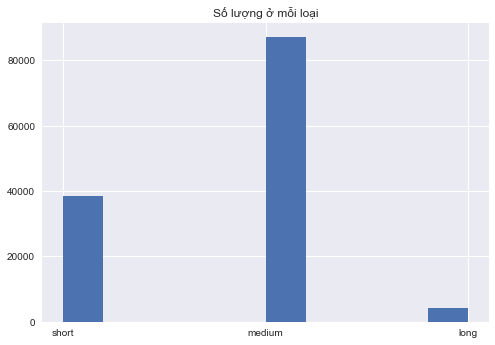

In [141]:
plt.title("Số lượng ở mỗi loại")

plt.hist(df_with_range["Range"], );

In [137]:
df_short   = df_with_range[df_with_range["Range"] == "short"]
df_medium  = df_with_range[df_with_range["Range"] == "medium"]
df_long    = df_with_range[df_with_range["Range"] == "long"]

In [138]:
#Lấy tương quan giữa satisfaction_bin và các cột số, bỏ cột tương quan satisfaction và chính nó (= 1)
A = df_short.corr()[["satisfaction_bin"]].drop("satisfaction_bin", axis=0)
B = df_medium.corr()[["satisfaction_bin"]].drop("satisfaction_bin", axis=0)
C = df_long.corr()[["satisfaction_bin"]].drop("satisfaction_bin", axis=0)

#Đổi tên cột để join thành 1 dataframe
A = A.rename({"satisfaction_bin"   : "Short corr"}, axis=1)
B = B.rename({"satisfaction_bin" : "Medium corr"}, axis=1)
C = C.rename({"satisfaction_bin" : "Long corr"}, axis=1)

D = A.join(B).join(C)

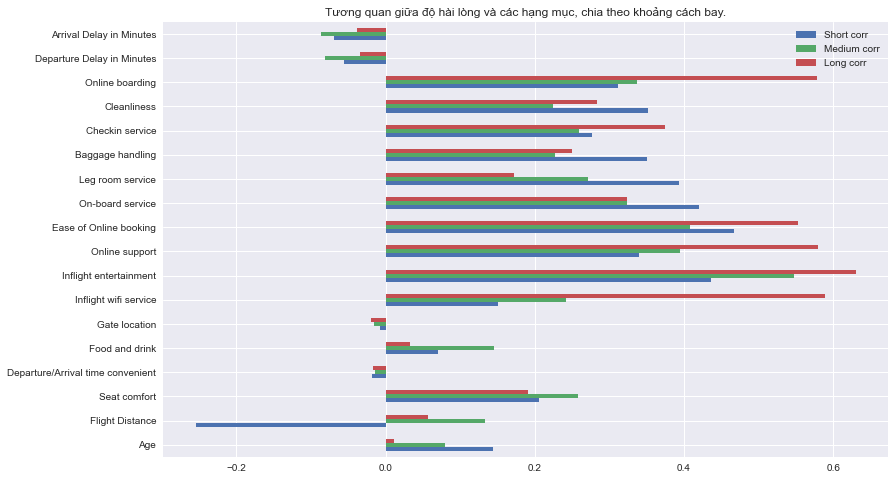

In [147]:
plt.figure(figsize=(13, 8))
plt.title("Tương quan giữa độ hài lòng và các hạng mục, chia theo khoảng cách bay.")

ax = plt.gca()
D.plot.barh(ax=ax)

Nhận xét:

+ Ở các chuyến bay đường dài, các dịch vụ online và liên quan đến giải trí, phục vụ trên chuyến bay trở nên quan trọng hơn.

+ Ở các chuyến bay gần, các công đoạn ở sân bay như khuân hành lý, checkin trở nên quan trọng hơn.

+ Ở cột Age, ta thấy ở các chuyến bay ngắn, những hành khách lớn tuổi thường có độ hài lòng cao hơn ở các chuyến bay dài.